<center><h1 style='color: #607d8b;'>Analise de perfil dos candidatos às eleições de 2018</h1></center>

<p>As eleições gerais no Brasil ocorrerão no domingo, 7 de outubro de 2018. Neste pleito, serão eleitos o Presidente do Brasil e o Vice-presidente, assim como membros do Parlamento. Serão 513 deputados federais e 54 senadores, além dos vinte e sete governadores dos Estados e do Distrito Federal</p>

<center><img src="http://www.tse.jus.br/imagens/fotos/vem-pra-urna-em-14-11-2017/@@images/529f921d-24ce-42be-a19f-8bb06f5f1b41.jpeg" alt="Eleições 2018"></center>

<h2>Origem da base de dados</h2>

<p>Essa base de dados tem sua origem no site do TSE, possuimos aqui o total das amostras dos dados pessoais (sexo, idade, estado civil, etc) dos candidatos as eleições 2018 no Brasil. Com base nas informações dessa base de dados, irei levantar questionamentos e responde-los, afim de encontrar informações relevantes.</p>
<ul>
    <li>http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais</li>
</ul>    

<h2>Vamos as perguntas!</h2>

<ul>
    <li>Qual o montante que cada candidato a presidência tem em bens declarados?</li>
    <li>Quais são os bens declarados dos candidatos a presidência?</li>
    <li>Qual o grau de instrução dos candidatos a presidência e qual a porcentagem?</li>
</ul>

<h3>Carregando o arquivo de perfil dos candidatos a presidência 2018</h3>

In [1]:
#-> Importando bibliotecas necessárias e carregando o arquivo de dados.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
#carregando o arquivo de perfil dos candidatos 
ds_perfil=pd.read_csv('consulta_cand_2018_BR.csv', sep=';', encoding='Latin 1')
ds_perfil.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
0,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,BRANCA,131,ADVOGADO,0,-1,#NULO#,N,S,-1,6008498420186000000
1,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,PARDA,142,PROFESSOR DE ENSINO SUPERIOR,-1,-1,#NULO#,N,S,-1,6008922120186000000
2,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,INDÍGENA,266,PROFESSOR DE ENSINO MÉDIO,-1,-1,#NULO#,N,S,-1,6008073520186000000
3,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,BRANCA,131,ADVOGADO,-1,-1,#NULO#,N,S,-1,6008905120186000000
4,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,BRANCA,101,ENGENHEIRO,0,-1,#NULO#,N,S,-1,6008835920186000000


In [2]:
#Avaliando os dados
ds_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 58 columns):
DT_GERACAO                       28 non-null object
HH_GERACAO                       28 non-null object
ANO_ELEICAO                      28 non-null int64
CD_TIPO_ELEICAO                  28 non-null int64
NM_TIPO_ELEICAO                  28 non-null object
NR_TURNO                         28 non-null int64
CD_ELEICAO                       28 non-null int64
DS_ELEICAO                       28 non-null object
DT_ELEICAO                       28 non-null object
TP_ABRANGENCIA                   28 non-null object
SG_UF                            28 non-null object
SG_UE                            28 non-null object
NM_UE                            28 non-null object
CD_CARGO                         28 non-null int64
DS_CARGO                         28 non-null object
SQ_CANDIDATO                     28 non-null int64
NR_CANDIDATO                     28 non-null int64
NM_CANDIDATO        

In [3]:
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    ds_perfil.columns[ds_perfil.isnull().any()].values))

Colunas com valores Faltantes: 
 [] 



In [4]:
#linhas duplicadas
print(" Duplicadas: {0} ".format(
        ds_perfil.duplicated().sum()))

 Duplicadas: 0 


In [5]:
#Verificando a quantidade de valores unicos em cada coluna
ds_perfil.nunique()

DT_GERACAO                        1
HH_GERACAO                        1
ANO_ELEICAO                       1
CD_TIPO_ELEICAO                   1
NM_TIPO_ELEICAO                   1
NR_TURNO                          1
CD_ELEICAO                        1
DS_ELEICAO                        1
DT_ELEICAO                        1
TP_ABRANGENCIA                    1
SG_UF                             1
SG_UE                             1
NM_UE                             1
CD_CARGO                          2
DS_CARGO                          2
SQ_CANDIDATO                     28
NR_CANDIDATO                     13
NM_CANDIDATO                     27
NM_URNA_CANDIDATO                27
NM_SOCIAL_CANDIDATO               1
NR_CPF_CANDIDATO                 27
NM_EMAIL                         19
CD_SITUACAO_CANDIDATURA           2
DS_SITUACAO_CANDIDATURA           2
CD_DETALHE_SITUACAO_CAND          3
DS_DETALHE_SITUACAO_CAND          3
TP_AGREMIACAO                     2
NR_PARTIDO                  

<h3>Carregando arquivo sobre os bens declarados dos candidatos!</h3>

In [6]:
ds_bens=pd.read_csv('bem_candidato_2018_BR.csv', sep=';', encoding='Latin 1')
ds_bens.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,27/09/2018,19:04:45,2018,2,Eleição Ordinária,295,Eleição Geral Federal 2018,07/10/2018,BR,BR,BRASIL,280000602478,10,61,Depósito bancário em conta corrente no País,Saldo em conta corrente no Banco do Brasil,"12879,76",17/09/2018,19:07:20
1,27/09/2018,19:04:45,2018,2,Eleição Ordinária,295,Eleição Geral Federal 2018,07/10/2018,BR,BR,BRASIL,280000605590,5,39,Outras participações societárias,PARTIC. SOCIET. NA EMP. ALIANÇA IMOVEIS URBANO...,"24000,00",17/09/2018,19:36:12
2,27/09/2018,19:04:45,2018,2,Eleição Ordinária,295,Eleição Geral Federal 2018,07/10/2018,BR,BR,BRASIL,280000624085,3,12,Casa,#NULO#,"157489,56",17/09/2018,19:36:11
3,27/09/2018,19:04:45,2018,2,Eleição Ordinária,295,Eleição Geral Federal 2018,07/10/2018,BR,BR,BRASIL,280000624085,15,31,Ações (inclusive as provenientes de linha tele...,#NULO#,"3459,00",17/09/2018,19:36:11
4,27/09/2018,19:04:45,2018,2,Eleição Ordinária,295,Eleição Geral Federal 2018,07/10/2018,BR,BR,BRASIL,280000624085,18,39,Outras participações societárias,#NULO#,"2500,00",17/09/2018,19:36:11


In [7]:
#Avaliando os dados
ds_bens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 19 columns):
DT_GERACAO               315 non-null object
HH_GERACAO               315 non-null object
ANO_ELEICAO              315 non-null int64
CD_TIPO_ELEICAO          315 non-null int64
NM_TIPO_ELEICAO          315 non-null object
CD_ELEICAO               315 non-null int64
DS_ELEICAO               315 non-null object
DT_ELEICAO               315 non-null object
SG_UF                    315 non-null object
SG_UE                    315 non-null object
NM_UE                    315 non-null object
SQ_CANDIDATO             315 non-null int64
NR_ORDEM_CANDIDATO       315 non-null int64
CD_TIPO_BEM_CANDIDATO    315 non-null int64
DS_TIPO_BEM_CANDIDATO    315 non-null object
DS_BEM_CANDIDATO         315 non-null object
VR_BEM_CANDIDATO         315 non-null object
DT_ULTIMA_ATUALIZACAO    315 non-null object
HH_ULTIMA_ATUALIZACAO    315 non-null object
dtypes: int64(6), object(13)
memory usage: 46.

In [8]:
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    ds_bens.columns[ds_bens.isnull().any()].values))

Colunas com valores Faltantes: 
 [] 



In [9]:
#linhas duplicadas
print(" Duplicadas: {0} ".format(
        ds_bens.duplicated().sum()))

 Duplicadas: 0 


In [10]:
#Verificando a quantidade de valores unicos em cada coluna
ds_bens.nunique()

DT_GERACAO                 1
HH_GERACAO                 1
ANO_ELEICAO                1
CD_TIPO_ELEICAO            1
NM_TIPO_ELEICAO            1
CD_ELEICAO                 1
DS_ELEICAO                 1
DT_ELEICAO                 1
SG_UF                      1
SG_UE                      1
NM_UE                      1
SQ_CANDIDATO              27
NR_ORDEM_CANDIDATO        39
CD_TIPO_BEM_CANDIDATO     35
DS_TIPO_BEM_CANDIDATO     35
DS_BEM_CANDIDATO         169
VR_BEM_CANDIDATO         274
DT_ULTIMA_ATUALIZACAO      3
HH_ULTIMA_ATUALIZACAO      7
dtype: int64

<h2 style='color: #607d8b;'>Limpeza dos dados</h2>

In [11]:
#Deixando todos os rótulos em letras minusculas
ds_perfil.rename(columns=lambda x:x.strip().lower(), inplace=True)
ds_bens.rename(columns=lambda x:x.strip().lower(), inplace=True)

# confirmando as mudanças
ds_perfil.head(1)

,dt_geracao,hh_geracao,ano_eleicao,cd_tipo_eleicao,nm_tipo_eleicao,nr_turno,cd_eleicao,ds_eleicao,dt_eleicao,tp_abrangencia,...,ds_cor_raca,cd_ocupacao,ds_ocupacao,nr_despesa_max_campanha,cd_sit_tot_turno,ds_sit_tot_turno,st_reeleicao,st_declarar_bens,nr_protocolo_candidatura,nr_processo
0,27/09/2018,19:04:59,2018,2,ELEIÇÃO ORDINÁRIA,1,295,Eleição Geral Federal 2018,07/10/2018,FEDERAL,...,BRANCA,131,ADVOGADO,0,-1,#NULO#,N,S,-1,6008498420186000000


In [12]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['dt_geracao', 'hh_geracao', 'cd_tipo_eleicao', 'nr_turno', 'cd_eleicao', 'cd_ocupacao', 'cd_sit_tot_turno', 'ds_sit_tot_turno' ])
ds_perfil.head(1)

,ano_eleicao,nm_tipo_eleicao,ds_eleicao,dt_eleicao,tp_abrangencia,sg_uf,sg_ue,nm_ue,cd_cargo,ds_cargo,...,cd_estado_civil,ds_estado_civil,cd_cor_raca,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha,st_reeleicao,st_declarar_bens,nr_protocolo_candidatura,nr_processo
0,2018,ELEIÇÃO ORDINÁRIA,Eleição Geral Federal 2018,07/10/2018,FEDERAL,BR,BR,BRASIL,1,PRESIDENTE,...,9,DIVORCIADO(A),1,BRANCA,ADVOGADO,0,N,S,-1,6008498420186000000


In [13]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['sg_uf', 'sg_ue', 'cd_cargo', 'cd_estado_civil' ,'cd_cor_raca', 'dt_nascimento', 'cd_situacao_candidatura'])
ds_perfil.head(1)

,ano_eleicao,nm_tipo_eleicao,ds_eleicao,dt_eleicao,tp_abrangencia,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,...,cd_grau_instrucao,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha,st_reeleicao,st_declarar_bens,nr_protocolo_candidatura,nr_processo
0,2018,ELEIÇÃO ORDINÁRIA,Eleição Geral Federal 2018,07/10/2018,FEDERAL,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,...,8,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0,N,S,-1,6008498420186000000


In [14]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['cd_grau_instrucao', 'nr_protocolo_candidatura', 'tp_abrangencia', "nm_tipo_eleicao", 'nr_cpf_candidato', 'nm_email' ])
ds_perfil.head(1)

,ano_eleicao,ds_eleicao,dt_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,...,cd_genero,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha,st_reeleicao,st_declarar_bens,nr_processo
0,2018,Eleição Geral Federal 2018,07/10/2018,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,CIRO GOMES,#NULO#,...,2,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0,N,S,6008498420186000000


In [15]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['cd_genero', 'ds_eleicao','dt_eleicao','nr_titulo_eleitoral_candidato', 'st_reeleicao', 'nr_processo' ])
ds_perfil.head(1)

,ano_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,ds_situacao_candidatura,cd_detalhe_situacao_cand,...,cd_municipio_nascimento,nm_municipio_nascimento,nr_idade_data_posse,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha,st_declarar_bens
0,2018,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,CIRO GOMES,#NULO#,APTO,2,...,-3,PINDAMONHANGABA,61,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0,S


In [16]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['cd_detalhe_situacao_cand', 'cd_municipio_nascimento', 'ds_detalhe_situacao_cand', 'nm_municipio_nascimento', 'tp_agremiacao', 'ds_nacionalidade' ])
ds_perfil.head(1)

,ano_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,ds_situacao_candidatura,nr_partido,...,cd_nacionalidade,sg_uf_nascimento,nr_idade_data_posse,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha,st_declarar_bens
0,2018,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,CIRO GOMES,#NULO#,APTO,12,...,1,SP,61,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0,S


In [17]:
#Excluindo colunas que não seram necessárias na nossa analise de perfil
ds_perfil = ds_perfil.drop(columns=['nr_partido', 'cd_nacionalidade', 'ds_composicao_coligacao', 'st_declarar_bens', 'nm_coligacao', 'nm_partido', 'sq_coligacao' ])
ds_perfil.head(1)

,ano_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,ds_situacao_candidatura,sg_partido,sg_uf_nascimento,nr_idade_data_posse,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha
0,2018,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,CIRO GOMES,#NULO#,APTO,PDT,SP,61,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0


In [18]:
#Excluindo colunas que não seram necessárias na nossa analise de bens
ds_bens = ds_bens.drop(columns=['dt_geracao','hh_geracao', 'ano_eleicao', 'cd_tipo_eleicao', 'nm_tipo_eleicao', 'cd_eleicao', 'ds_eleicao', 'dt_eleicao' ])
ds_bens.head(1)

,sg_uf,sg_ue,nm_ue,sq_candidato,nr_ordem_candidato,cd_tipo_bem_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,hh_ultima_atualizacao
0,BR,BR,BRASIL,280000602478,10,61,Depósito bancário em conta corrente no País,Saldo em conta corrente no Banco do Brasil,"12879,76",17/09/2018,19:07:20


In [19]:
#Excluindo colunas que não seram necessárias na nossa analise de bens
ds_bens = ds_bens.drop(columns=['sg_uf', 'sg_ue','nm_ue', 'nr_ordem_candidato', 'cd_tipo_bem_candidato', 'hh_ultima_atualizacao'])
ds_bens.head(1)

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao
0,280000602478,Depósito bancário em conta corrente no País,Saldo em conta corrente no Banco do Brasil,"12879,76",17/09/2018


In [20]:
#Carregando o arquivo de perfil para conferência
ds_perfil.head()

,ano_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,ds_situacao_candidatura,sg_partido,sg_uf_nascimento,nr_idade_data_posse,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha
0,2018,BRASIL,PRESIDENTE,280000605589,12,CIRO FERREIRA GOMES,CIRO GOMES,#NULO#,APTO,PDT,SP,61,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,0
1,2018,BRASIL,VICE-PRESIDENTE,280000624086,27,HELVIO COSTA DE OLIVEIRA TELLES,HELVIO COSTA,#NULO#,APTO,DC,RJ,46,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO SUPERIOR,-1
2,2018,BRASIL,VICE-PRESIDENTE,280000601017,50,SONIA BONE DE SOUSA SILVA SANTOS,SONIA GUAJAJARA,#NULO#,APTO,PSOL,MA,44,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),INDÍGENA,PROFESSOR DE ENSINO MÉDIO,-1
3,2018,BRASIL,VICE-PRESIDENTE,280000624083,54,LÉO DA SILVA ALVES,LÉO DA SILVA ALVES,#NULO#,APTO,PPL,RS,63,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ADVOGADO,-1
4,2018,BRASIL,PRESIDENTE,280000622281,15,HENRIQUE DE CAMPOS MEIRELLES,HENRIQUE MEIRELLES,#NULO#,APTO,MDB,GO,73,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ENGENHEIRO,0


In [21]:
#Carregando o arquivo de bens para conferência
ds_bens.head()

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao
0,280000602478,Depósito bancário em conta corrente no País,Saldo em conta corrente no Banco do Brasil,"12879,76",17/09/2018
1,280000605590,Outras participações societárias,PARTIC. SOCIET. NA EMP. ALIANÇA IMOVEIS URBANO...,"24000,00",17/09/2018
2,280000624085,Casa,#NULO#,"157489,56",17/09/2018
3,280000624085,Ações (inclusive as provenientes de linha tele...,#NULO#,"3459,00",17/09/2018
4,280000624085,Outras participações societárias,#NULO#,"2500,00",17/09/2018


<h4>Resumo - Limpeza de Dados</h4>
<ul>
    <li>Primeiramente carregamos os dados para analisarmos os dados contidos nos dataframes</li>
    <li>Nos dois arquivos não foram encontrados dados em duplicidade e nem dados nulos que impactassem nossa analise geral</li>
    <li>Eliminamos algumas colunas que não possuiam valor para essa pesquisa</li>
</ul>    

<h3 style='color: #607d8b;'>Vamos investigar e relacionar os dados pessoais dos candidatos a presidência e os seus bens declarados</h3>

In [22]:
#Verificando os candidatos a presidencia e o seu número sq_candidato
presidente = ds_perfil.query('ds_cargo == "PRESIDENTE"')

#Verificando os candidato aptos! 
presidente_apto = presidente.query('ds_situacao_candidatura == "APTO"')

# mescle os conjuntos de dados
right = presidente_apto['sq_candidato'].to_frame()
left = presidente_apto['nm_urna_candidato'].to_frame()
df_combined = pd.merge(left, right, left_index=True, right_index=True)

# exiba para verificar a mesclagem
df_combined

,nm_urna_candidato,sq_candidato
0,CIRO GOMES,280000605589
4,HENRIQUE MEIRELLES,280000622281
7,JOÃO AMOÊDO,280000607640
9,ALVARO DIAS,280000618462
10,EYMAEL,280000624085
12,JAIR BOLSONARO,280000614517
13,FERNANDO HADDAD,280000629808
14,GERALDO ALCKMIN,280000602477
15,VERA,280000601173
18,JOÃO GOULART FILHO,280000624082


<h4>Separando os bens de cada candidato</h4>


In [23]:
#Verificando os bens do candidato Ciro Gomes
bens_ciro_gomes = ds_bens.query('sq_candidato == 280000605589')

#Incluindo a coluna candidato no dataframe
bens_ciro_gomes['candidato'] = "Ciro Gomes"
bens_ciro_gomes.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
12,280000605589,Outros créditos e poupança vinculados,"CREDITO A RECEBER DE LUCIO FERREIRA GOMES, DEC...","13584,22",17/09/2018,Ciro Gomes
59,280000605589,Outros bens imóveis,1/5 DE UM IMOVEL RESIDENCIAL SITUADO NO BOULEV...,"160000,00",17/09/2018,Ciro Gomes
60,280000605589,Casa,UMA CASA NA AV. DR. JOSE ARIMATEIA MONTE E SIL...,"300000,00",17/09/2018,Ciro Gomes
66,280000605589,Outros créditos e poupança vinculados,"CREDITO COM LIVIA SABOYA FERREIRA GOMES, DECOR...","51990,69",17/09/2018,Ciro Gomes
86,280000605589,Outras participações societárias,50% de PARTICIPAÇÃO NA EMPRESA XEREZ SALDANHA ...,"25000,00",17/09/2018,Ciro Gomes


In [24]:
#Verificando os bens do candidato HENRIQUE MEIRELLES
bens_henrique_meirelles = ds_bens.query('sq_candidato == 280000622281')

#Incluindo a coluna candidato no dataframe
bens_henrique_meirelles['candidato'] = "Henrique Meirelles"
bens_henrique_meirelles.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
15,280000622281,Crédito decorrente de empréstimo,#NULO#,"855160,00",17/09/2018,Henrique Meirelles
27,280000622281,Terreno,#NULO#,"169,96",17/09/2018,Henrique Meirelles
43,280000622281,Apartamento,#NULO#,"21877940,30",17/09/2018,Henrique Meirelles
64,280000622281,Fundo de Longo Prazo e Fundo de Investimentos ...,#NULO#,"58821382,45",17/09/2018,Henrique Meirelles
89,280000622281,Depósito bancário em conta corrente no exterior,#NULO#,"6895891,05",17/09/2018,Henrique Meirelles


In [25]:
#Verificando os bens do candidato JOÃO AMOÊDO
bens_joao_amoedo = ds_bens.query('sq_candidato == 280000607640')

#Incluindo a coluna candidato no dataframe
bens_joao_amoedo['candidato'] = "João Amoêdo"
bens_joao_amoedo.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
28,280000607640,Apartamento,#NULO#,"5090453,91",17/09/2018,João Amoêdo
29,280000607640,"Veículo automotor terrestre: caminhão, automóv...",#NULO#,"102000,00",17/09/2018,João Amoêdo
30,280000607640,Título de clube e assemelhado,#NULO#,"340000,00",17/09/2018,João Amoêdo
44,280000607640,"Veículo automotor terrestre: caminhão, automóv...",#NULO#,"168000,00",17/09/2018,João Amoêdo
47,280000607640,"Jóia, quadro, objeto de arte, de coleção, anti...",#NULO#,"1173645,00",17/09/2018,João Amoêdo


In [26]:
#Verificando os bens do candidato ALVARO DIAS
bens_alvaro_dias = ds_bens.query('sq_candidato == 280000618462')

#Incluindo a coluna candidato no dataframe
bens_alvaro_dias['candidato'] = "Alvaro Dias"
bens_alvaro_dias.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
10,280000618462,Depósito bancário em conta corrente no País,BANCO DO BRASIL S/A - BB REF DI CASH PVT - AG...,"514091,45",17/09/2018,Alvaro Dias
74,280000618462,Depósito bancário em conta corrente no País,BANCO ITAU S/A - CONTA CORRENTE - AG 3812 CONT...,"10,00",17/09/2018,Alvaro Dias
110,280000618462,"Veículo automotor terrestre: caminhão, automóv...",BMW MODELO 320 IA CHASSI W8AEV11044KK75129 ANO...,"128000,00",17/09/2018,Alvaro Dias
111,280000618462,Ações (inclusive as provenientes de linha tele...,BANCO DO BRASIL S/A - ACOES EM CUSTODIA ( 5.60...,"255399,65",17/09/2018,Alvaro Dias
131,280000618462,Caderneta de poupança,BANCO DO BRASIL S/A - POUPANCA OURO AG. 4444-X...,"0,29",17/09/2018,Alvaro Dias


In [27]:
#Verificando os bens do candidato EYMAEL
bens_eymael = ds_bens.query('sq_candidato == 280000624085')

#Incluindo a coluna candidato no dataframe
bens_eymael['candidato'] = "Eymael"
bens_eymael.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
2,280000624085,Casa,#NULO#,"157489,56",17/09/2018,Eymael
3,280000624085,Ações (inclusive as provenientes de linha tele...,#NULO#,"3459,00",17/09/2018,Eymael
4,280000624085,Outras participações societárias,#NULO#,"2500,00",17/09/2018,Eymael
5,280000624085,Embarcação,#NULO#,"123770,00",17/09/2018,Eymael
6,280000624085,Crédito decorrente de empréstimo,#NULO#,"4000,00",17/09/2018,Eymael


In [28]:
#Verificando os bens do candidato JAIR BOLSONARO
bens_jair_bolsonaro = ds_bens.query('sq_candidato == 280000614517')

#Incluindo a coluna candidato no dataframe
bens_jair_bolsonaro['candidato'] = "Jair Bolsonarao"
bens_jair_bolsonaro.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
35,280000614517,Ações (inclusive as provenientes de linha tele...,60 ações ON da Oi S/A,"725,40",17/09/2018,Jair Bolsonarao
50,280000614517,"Aplicação de renda fixa (CDB, RDB e outros)","Banco do Brasil S/A, 4884-4 - 268.324-5 - BB R...","73697,86",17/09/2018,Jair Bolsonarao
91,280000614517,Ações (inclusive as provenientes de linha tele...,67 ações PN da Oi S/A,"557,44",17/09/2018,Jair Bolsonarao
125,280000614517,Quotas ou quinhões de capital,249 cotas de Bolsorano Digital Ltda (27.516.31...,"249,00",17/09/2018,Jair Bolsonarao
162,280000614517,"Aplicação de renda fixa (CDB, RDB e outros)","Banco do Brasil S/A, 4884-4 - 278.324-x - BB R...","11372,37",17/09/2018,Jair Bolsonarao


In [29]:
#Verificando os bens do candidato FERNANDO HADDAD
bens_fernando_haddad = ds_bens.query('sq_candidato == 280000629808')

#Incluindo a coluna candidato no dataframe
bens_fernando_haddad['candidato'] = "Fernando Haddad"
bens_fernando_haddad.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
42,280000629808,Quotas ou quinhões de capital,#NULO#,"140446,26",26/09/2018,Fernando Haddad
45,280000629808,Apartamento,#NULO#,"90000,00",26/09/2018,Fernando Haddad
46,280000629808,Casa,#NULO#,"183000,00",26/09/2018,Fernando Haddad
230,280000629808,Depósito bancário em conta corrente no País,#NULO#,"15004,83",26/09/2018,Fernando Haddad


In [30]:
#Verificando os bens do candidato GERALDO ALCKMIN
bens_geraldo_alckmin = ds_bens.query('sq_candidato == 280000602477')

#Incluindo a coluna candidato no dataframe
bens_geraldo_alckmin['candidato'] = "Geraldo Alckmin"
bens_geraldo_alckmin.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
57,280000602477,Ações (inclusive as provenientes de linha tele...,Ações da Petrobras-PETR4[100],"1608,00",17/09/2018,Geraldo Alckmin
58,280000602477,Outros bens móveis,26 cabeças de gado,"48780,00",17/09/2018,Geraldo Alckmin
75,280000602477,Terra nua,"Uma gleba de terra com área de 8.4ha, denomina...","110959,51",17/09/2018,Geraldo Alckmin
96,280000602477,Terra nua,"Uma gleba de terra com área de 3.9ha, no Bairr...","30091,04",17/09/2018,Geraldo Alckmin
112,280000602477,Depósito bancário em conta corrente no País,Depósito bancário em conta corrente no Banco d...,"18820,67",17/09/2018,Geraldo Alckmin


In [31]:
#Verificando os bens do candidato VERA
bens_vera = ds_bens.query('sq_candidato == 280000601173')

#Incluindo a coluna candidato no dataframe
bens_vera['candidato'] = "Vera"
bens_vera.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
228,280000601173,Terreno,#NULO#,"20000,00",17/09/2018,Vera


In [32]:
#Verificando os bens do candidato JOÃO GOULART FILHO
bens_joao_goulart_filho = ds_bens.query('sq_candidato == 280000624082')

#Incluindo a coluna candidato no dataframe
bens_joao_goulart_filho['candidato'] = "João Goulart Filho"
bens_joao_goulart_filho.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
16,280000624082,Casa,#NULO#,"1,00",24/09/2018,João Goulart Filho
147,280000624082,Casa,#NULO#,"1,00",24/09/2018,João Goulart Filho
165,280000624082,Quotas ou quinhões de capital,#NULO#,"1189648,90",24/09/2018,João Goulart Filho
181,280000624082,Terreno,#NULO#,"90000,00",24/09/2018,João Goulart Filho
182,280000624082,Quotas ou quinhões de capital,#NULO#,"5824322,76",24/09/2018,João Goulart Filho


In [33]:
#Verificando os bens do candidato GUILHERME BOULOS
bens_guilherme_boulos = ds_bens.query('sq_candidato == 280000601016')

#Incluindo a coluna candidato no dataframe
bens_guilherme_boulos['candidato'] = "Guilherme Boulos"
bens_guilherme_boulos.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
174,280000601016,"Veículo automotor terrestre: caminhão, automóv...",#NULO#,"15416,00",17/09/2018,Guilherme Boulos


In [34]:
#Verificando os bens do candidato CABO DACIOLO
bens_cabo_daciolo = ds_bens.query('sq_candidato == 280000602500')

#Incluindo a coluna candidato no dataframe
bens_cabo_daciolo['candidato'] = "Cabo Daciolo"
bens_cabo_daciolo.head()

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato


In [35]:
#Verificando os bens do candidato MARINA SILVA
bens_marina_silva = ds_bens.query('sq_candidato == 280000622171')

#Incluindo a coluna candidato no dataframe
bens_marina_silva['candidato'] = "Marina Silva"
bens_marina_silva.head()

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
185,280000622171,Quotas ou quinhões de capital,Capital da Firma Individual M O M Da S. V. de ...,"5000,00",17/09/2018,Marina Silva
186,280000622171,Depósito bancário em conta corrente no País,Depósito em conta corrente no Banco do Brasil,"293,24",17/09/2018,Marina Silva
187,280000622171,Outros bens imóveis,"Seis lotes na chácara SHADA II, área total de ...","42481,50",17/09/2018,Marina Silva
212,280000622171,Casa,"Casa situada em Rio Branco - AC, com endereço ...","60000,00",17/09/2018,Marina Silva
215,280000622171,Caderneta de poupança,Depósito em conta corrente no Banco do Brasil,"3900,52",17/09/2018,Marina Silva


<h4>Vamos descobrir o montante que cada candidato tem em bens declarados</h4>

In [36]:
def total_bens(bens):
    """Calcular o montate dos bens declarado dos candidatos.
      Argumentos:
          bens: lista com os bens dos candidatos.
      Retorna:
          O valor total do montante dos bens dos candidatos."""
    bens['vr_bem_candidato'] = bens['vr_bem_candidato'].apply(lambda x: x.split(",")[0])
    bens['vr_bem_candidato'] = bens['vr_bem_candidato'].astype(float)
    
    return bens['vr_bem_candidato'].sum()



In [37]:
ciro = total_bens(bens_ciro_gomes)
print("Total dos bens de Ciro Gomes: {:.2f}".format(ciro))

meirelles = total_bens(bens_henrique_meirelles)
print("Total dos bens de Henrique Meirelles: {:.2f}".format(meirelles))

joao_amoedo = total_bens(bens_joao_amoedo)
print("Total dos bens de João Amoêdo: {:.2f}".format(joao_amoedo))

alvaro_dias = total_bens(bens_alvaro_dias)
print("Total dos bens de Alvaro Dias: {:.2f}".format(alvaro_dias))

eymael = total_bens(bens_eymael)
print("Total dos bens de Eymael: {:.2f}".format(eymael))

bolsonaro = total_bens(bens_jair_bolsonaro)
print("Total dos bens de Jair Bolsonaro: {:.2f}".format(bolsonaro))

haddad = total_bens(bens_fernando_haddad)
print("Total dos bens de Fernando Haddad: {:.2f}".format(haddad))

alckmin = total_bens(bens_geraldo_alckmin)
print("Total dos bens de Geraldo Alckmin: {:.2f}".format(alckmin))

vera = total_bens(bens_vera)
print("Total dos bens de Vera: {:.2f}".format(vera))

goulart = total_bens(bens_joao_goulart_filho)
print("Total dos bens de Joao Goulart Filho: {:.2f}".format(goulart))

boulos = total_bens(bens_guilherme_boulos)
print("Total dos bens de Guilherme Boulos: {:.2f}".format(boulos))

daciolo = total_bens(bens_cabo_daciolo)
print("Total dos bens de Cabo Daciolo: {:.2f}".format(daciolo))

marina = total_bens(bens_marina_silva)
print("Total dos bens de Marina Silva: {:.2f}".format(marina))

C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\JuanCaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Total dos bens de Ciro Gomes: 1695198.00
Total dos bens de Henrique Meirelles: 377496697.00
Total dos bens de João Amoêdo: 425066474.00
Total dos bens de Alvaro Dias: 2889930.00
Total dos bens de Eymael: 6135102.00
Total dos bens de Jair Bolsonaro: 2286776.00
Total dos bens de Fernando Haddad: 428450.00
Total dos bens de Geraldo Alckmin: 1379128.00
Total dos bens de Vera: 20000.00
Total dos bens de Joao Goulart Filho: 8591034.00
Total dos bens de Guilherme Boulos: 15416.00
Total dos bens de Cabo Daciolo: 0.00
Total dos bens de Marina Silva: 118833.00


Text(0.5,1,'Candidatos')

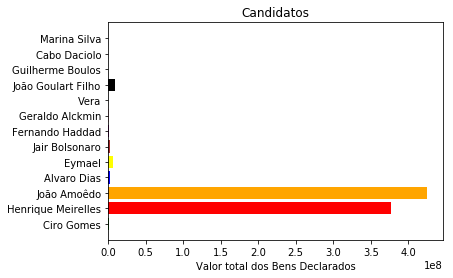

In [38]:
locations = [1, 2,3,4,5,6,7,8,9,10,11,12,13]
heights = [ciro, meirelles, joao_amoedo, alvaro_dias, eymael, bolsonaro, haddad, alckmin, vera, goulart, boulos, daciolo, marina]
labels = ['Ciro Gomes', 'Henrique Meirelles', 'João Amoêdo', 'Alvaro Dias', 'Eymael', 'Jair Bolsonaro', 'Fernando Haddad', 'Geraldo Alckmin', 'Vera', 'João Goulart Filho',  'Guilherme Boulos', 'Cabo Daciolo', 'Marina Silva']
colors = ['green', 'red', 'orange', 'blue', 'yellow', 'brown', 'purple', 'pink', 'grey', 'black', 'teal', 'lime', 'cyan']
plt.barh(locations, heights, align='center', color= colors, ecolor='black',tick_label=labels )
plt.xlabel('Valor total dos Bens Declarados')
plt.title('Candidatos')

Text(0.5,1,'Candidatos')

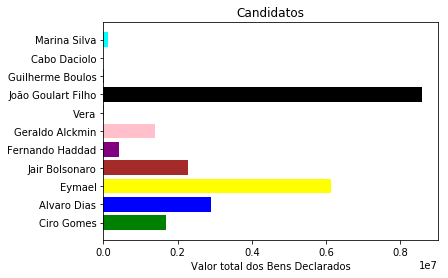

In [39]:
#Verificando o gráfico sem João Amoêdo e Henrique Meirelles
locations = [1, 2,3,4,5,6,7,8,9,10,11]
heights = [ciro, alvaro_dias, eymael, bolsonaro, haddad, alckmin, vera, goulart, boulos, daciolo, marina]
labels = ['Ciro Gomes', 'Alvaro Dias', 'Eymael', 'Jair Bolsonaro', 'Fernando Haddad', 'Geraldo Alckmin', 'Vera', 'João Goulart Filho',  'Guilherme Boulos', 'Cabo Daciolo', 'Marina Silva']
colors = ['green', 'blue', 'yellow', 'brown', 'purple', 'pink', 'grey', 'black', 'teal', 'lime', 'cyan']
plt.barh(locations, heights, align='center', color= colors, ecolor='black',tick_label=labels )
plt.xlabel('Valor total dos Bens Declarados')
plt.title('Candidatos')

Text(0.5,1,'Candidatos')

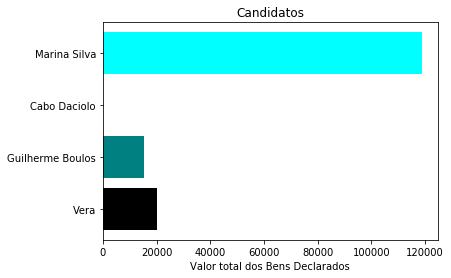

In [40]:
#Verificando agora somente os candidatos com os menores valores:
#Verificando o gráfico sem João Amoêdo e Henrique Meirelles
locations = [1, 2,3,4]
heights = [vera, boulos, daciolo, marina]
labels = ['Vera', 'Guilherme Boulos', 'Cabo Daciolo', 'Marina Silva']
colors = ['black', 'teal', 'lime', 'cyan']
plt.barh(locations, heights, align='center', color= colors, ecolor='black',tick_label=labels )
plt.xlabel('Valor total dos Bens Declarados')
plt.title('Candidatos')

<strong>Aqui podemos perceber que os candidatos Henrique Meirelles (377.496.697,00) e o candidato João Amoêdo (425.066.474,00), são os que possuem o maior valor de bens e é um valor bem disproporcional aos outros candidatos. Outro fator interessante aqui é o Cabo Daciolo que não possui nem um valor de bem declarado</strong>

<h4>Vamos verificar os bens de cada um candidato</h4>

In [41]:
#Ciro Gomes
bens_ciro_gomes

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
12,280000605589,Outros créditos e poupança vinculados,"CREDITO A RECEBER DE LUCIO FERREIRA GOMES, DEC...",13584.0,17/09/2018,Ciro Gomes
59,280000605589,Outros bens imóveis,1/5 DE UM IMOVEL RESIDENCIAL SITUADO NO BOULEV...,160000.0,17/09/2018,Ciro Gomes
60,280000605589,Casa,UMA CASA NA AV. DR. JOSE ARIMATEIA MONTE E SIL...,300000.0,17/09/2018,Ciro Gomes
66,280000605589,Outros créditos e poupança vinculados,"CREDITO COM LIVIA SABOYA FERREIRA GOMES, DECOR...",51990.0,17/09/2018,Ciro Gomes
86,280000605589,Outras participações societárias,50% de PARTICIPAÇÃO NA EMPRESA XEREZ SALDANHA ...,25000.0,17/09/2018,Ciro Gomes
93,280000605589,"Veículo automotor terrestre: caminhão, automóv...",VEICULO HYUNDAI ELANTRA MD 1.8 AUT. 2012/2013.,85000.0,17/09/2018,Ciro Gomes
138,280000605589,Outros créditos e poupança vinculados,"CREDITO A RECEBER DE LUCIO FERREIRA GOMES, DEC...",37477.0,17/09/2018,Ciro Gomes
218,280000605589,Apartamento,"APART. AV. HISTORIADOR RAIMUNDO GIRAO, 700/230...",381202.0,17/09/2018,Ciro Gomes
244,280000605589,Depósito bancário em conta corrente no País,"CONTA CORRENTE BANCO DO BRASIL, AG. 5110-1, CO...",466.0,17/09/2018,Ciro Gomes
263,280000605589,Outros depósitos à vista e numerário,VALORES NA POSSE DA SRA. MARIA LUIZA GURGEL SE...,65624.0,17/09/2018,Ciro Gomes


<strong>Aqui podemos perceber muitos créditos em nome de parentes/filhos boa parte deles no valor de 51.990,00</strong>

In [42]:
#Henrique Meirelles
bens_henrique_meirelles

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
15,280000622281,Crédito decorrente de empréstimo,#NULO#,855160.0,17/09/2018,Henrique Meirelles
27,280000622281,Terreno,#NULO#,169.0,17/09/2018,Henrique Meirelles
43,280000622281,Apartamento,#NULO#,21877940.0,17/09/2018,Henrique Meirelles
64,280000622281,Fundo de Longo Prazo e Fundo de Investimentos ...,#NULO#,58821382.0,17/09/2018,Henrique Meirelles
89,280000622281,Depósito bancário em conta corrente no exterior,#NULO#,6895891.0,17/09/2018,Henrique Meirelles
90,280000622281,Depósito bancário em conta corrente no País,#NULO#,7948.0,17/09/2018,Henrique Meirelles
105,280000622281,Quotas ou quinhões de capital,#NULO#,2914774.0,17/09/2018,Henrique Meirelles
120,280000622281,Sala ou conjunto,#NULO#,1020290.0,17/09/2018,Henrique Meirelles
143,280000622281,Outros fundos,#NULO#,60000.0,17/09/2018,Henrique Meirelles
145,280000622281,Terra nua,#NULO#,1.0,17/09/2018,Henrique Meirelles


<strong>Anormalidades: Terreno no valor de 169,00 e Terra nua no valor de 1,00 </strong>

In [43]:
#Alvaro Dias 
bens_alvaro_dias

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
10,280000618462,Depósito bancário em conta corrente no País,BANCO DO BRASIL S/A - BB REF DI CASH PVT - AG...,514091.0,17/09/2018,Alvaro Dias
74,280000618462,Depósito bancário em conta corrente no País,BANCO ITAU S/A - CONTA CORRENTE - AG 3812 CONT...,10.0,17/09/2018,Alvaro Dias
110,280000618462,"Veículo automotor terrestre: caminhão, automóv...",BMW MODELO 320 IA CHASSI W8AEV11044KK75129 ANO...,128000.0,17/09/2018,Alvaro Dias
111,280000618462,Ações (inclusive as provenientes de linha tele...,BANCO DO BRASIL S/A - ACOES EM CUSTODIA ( 5.60...,255399.0,17/09/2018,Alvaro Dias
131,280000618462,Caderneta de poupança,BANCO DO BRASIL S/A - POUPANCA OURO AG. 4444-X...,0.0,17/09/2018,Alvaro Dias
161,280000618462,Depósito bancário em conta corrente no País,JCP BANCO BRADESCO EXERCICIO 2017.,2159.0,17/09/2018,Alvaro Dias
199,280000618462,Outras participações societárias,CAD TRADE E EMPREENDIMENTOS LTDA - CNPJ 01.339...,560000.0,17/09/2018,Alvaro Dias
245,280000618462,Outras aplicações e Investimentos,JCP VALE S/A EXERCÍCIO 2017,2000.0,17/09/2018,Alvaro Dias
291,280000618462,Depósito bancário em conta corrente no País,CONTACORRENTE PRIVATE BANCO DO BRASIL AG 4444-...,22061.0,17/09/2018,Alvaro Dias
295,280000618462,Quotas ou quinhões de capital,PARTICIPACAO NO CAPITAL SOCIAL DA EMPRESA CAD ...,1406210.0,17/09/2018,Alvaro Dias


In [44]:
#Jair Bolsonaro
bens_jair_bolsonaro

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
35,280000614517,Ações (inclusive as provenientes de linha tele...,60 ações ON da Oi S/A,725.0,17/09/2018,Jair Bolsonarao
50,280000614517,"Aplicação de renda fixa (CDB, RDB e outros)","Banco do Brasil S/A, 4884-4 - 268.324-5 - BB R...",73697.0,17/09/2018,Jair Bolsonarao
91,280000614517,Ações (inclusive as provenientes de linha tele...,67 ações PN da Oi S/A,557.0,17/09/2018,Jair Bolsonarao
125,280000614517,Quotas ou quinhões de capital,249 cotas de Bolsorano Digital Ltda (27.516.31...,249.0,17/09/2018,Jair Bolsonarao
162,280000614517,"Aplicação de renda fixa (CDB, RDB e outros)","Banco do Brasil S/A, 4884-4 - 278.324-x - BB R...",11372.0,17/09/2018,Jair Bolsonarao
168,280000614517,Casa,"Imóvel na Av. Lúcio Costa, 3.100, Casa 56, Bar...",400000.0,17/09/2018,Jair Bolsonarao
169,280000614517,Casa,"Imóvel na SQSW 102, Bloco C, Apartamento 604, ...",240930.0,17/09/2018,Jair Bolsonarao
188,280000614517,"Veículo automotor terrestre: caminhão, automóv...","Microonibus Mercedes Benz Sprinter 313, ano 2004",89000.0,17/09/2018,Jair Bolsonarao
216,280000614517,"Veículo automotor terrestre: caminhão, automóv...","Land Rover Freelander 2 SE, 2009/2010, placa E...",50000.0,17/09/2018,Jair Bolsonarao
219,280000614517,Caderneta de poupança,"Banco do Brasil S/A, 4884-4 - 010.268.324-7 - ...",481836.0,17/09/2018,Jair Bolsonarao


In [45]:
#Fernando Haddad
bens_fernando_haddad

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
42,280000629808,Quotas ou quinhões de capital,#NULO#,140446.0,26/09/2018,Fernando Haddad
45,280000629808,Apartamento,#NULO#,90000.0,26/09/2018,Fernando Haddad
46,280000629808,Casa,#NULO#,183000.0,26/09/2018,Fernando Haddad
230,280000629808,Depósito bancário em conta corrente no País,#NULO#,15004.0,26/09/2018,Fernando Haddad


In [46]:
#Geraldo Alckmin
bens_geraldo_alckmin

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
57,280000602477,Ações (inclusive as provenientes de linha tele...,Ações da Petrobras-PETR4[100],1608.0,17/09/2018,Geraldo Alckmin
58,280000602477,Outros bens móveis,26 cabeças de gado,48780.0,17/09/2018,Geraldo Alckmin
75,280000602477,Terra nua,"Uma gleba de terra com área de 8.4ha, denomina...",110959.0,17/09/2018,Geraldo Alckmin
96,280000602477,Terra nua,"Uma gleba de terra com área de 3.9ha, no Bairr...",30091.0,17/09/2018,Geraldo Alckmin
112,280000602477,Depósito bancário em conta corrente no País,Depósito bancário em conta corrente no Banco d...,18820.0,17/09/2018,Geraldo Alckmin
156,280000602477,Quotas ou quinhões de capital,80% do capital social da firma Humanitas Fórum...,24000.0,17/09/2018,Geraldo Alckmin
159,280000602477,Casa,"Casa no Bairro Campo Alegre, Pindamonhangaba - SP",52822.0,17/09/2018,Geraldo Alckmin
175,280000602477,VGBL - Vida Gerador de Benefício Livre,Fundo de Investimento no Banco do Brasil,391485.0,17/09/2018,Geraldo Alckmin
176,280000602477,Depósito bancário em conta corrente no País,Depósito bancário em conta corrente no Banco d...,15000.0,17/09/2018,Geraldo Alckmin
193,280000602477,Outros bens imóveis,"1/3 do imóvel rural espólio de seu pai, Gerald...",20000.0,17/09/2018,Geraldo Alckmin


In [47]:
#Marina Silva
bens_marina_silva

,sq_candidato,ds_tipo_bem_candidato,ds_bem_candidato,vr_bem_candidato,dt_ultima_atualizacao,candidato
185,280000622171,Quotas ou quinhões de capital,Capital da Firma Individual M O M Da S. V. de ...,5000.0,17/09/2018,Marina Silva
186,280000622171,Depósito bancário em conta corrente no País,Depósito em conta corrente no Banco do Brasil,293.0,17/09/2018,Marina Silva
187,280000622171,Outros bens imóveis,"Seis lotes na chácara SHADA II, área total de ...",42481.0,17/09/2018,Marina Silva
212,280000622171,Casa,"Casa situada em Rio Branco - AC, com endereço ...",60000.0,17/09/2018,Marina Silva
215,280000622171,Caderneta de poupança,Depósito em conta corrente no Banco do Brasil,3900.0,17/09/2018,Marina Silva
257,280000622171,"Aplicação de renda fixa (CDB, RDB e outros)",Aplicação no Bradesco (CNPJ 60.746.948/0001-12),7159.0,17/09/2018,Marina Silva


<h4>Vamos descobrir o nível de escolaridade dos candidatos</h4>

In [48]:
#Buscando o total de sobreviventes
superior_completo = presidente_apto.query('ds_grau_instrucao == "SUPERIOR COMPLETO"')

#Buscando o total de não sobreviventes
superior_incompleto = presidente_apto.query('ds_grau_instrucao == "SUPERIOR INCOMPLETO"')

print("Total de candidatos com ensino Superior Completo: {}".format(superior_completo.shape[0]))
print("Total de candidatos com ensino Superior Incompleto: {}".format(superior_incompleto.shape[0]))

Total de candidatos com ensino Superior Completo: 12
Total de candidatos com ensino Superior Incompleto: 1


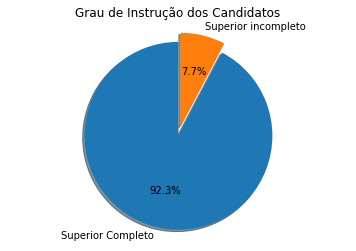

In [49]:
labels = 'Superior Completo', 'Superior incompleto'
total_class = [superior_completo.shape[0], superior_incompleto.shape[0]]
explode = (0, 0.1)
  
fig1, ax1 = plt.subplots()
  
ax1.pie(total_class, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Grau de Instrução dos Candidatos')
  
plt.show()

In [50]:
superior_incompleto

,ano_eleicao,nm_ue,ds_cargo,sq_candidato,nr_candidato,nm_candidato,nm_urna_candidato,nm_social_candidato,ds_situacao_candidatura,sg_partido,sg_uf_nascimento,nr_idade_data_posse,ds_genero,ds_grau_instrucao,ds_estado_civil,ds_cor_raca,ds_ocupacao,nr_despesa_max_campanha
18,2018,BRASIL,PRESIDENTE,280000624082,54,JOÃO VICENTE FONTELLA GOULART,JOÃO GOULART FILHO,#NULO#,APTO,PPL,RJ,62,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,ESCRITOR E CRÍTICO,0


<h4>Podemos constatar que 92,3% dos candidatos a presidência possuem o nível Superior Completo, o único candidato que não possui o ensino superior completo é o João Goulart Filho</h4>


<h2 style='color: #607d8b;'>Conclusão</h2>